In [153]:
import pandas as pd

# Load your dataset
auto = pd.read_csv('adverts.csv')
auto.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [154]:
for col in auto.columns:
    print(f"{col} has {auto[col].isnull().sum()} null values")

public_reference has 0 null values
mileage has 127 null values
reg_code has 31857 null values
standard_colour has 5378 null values
standard_make has 0 null values
standard_model has 0 null values
vehicle_condition has 0 null values
year_of_registration has 33311 null values
price has 0 null values
body_type has 837 null values
crossover_car_and_van has 0 null values
fuel_type has 601 null values


In [155]:
auto.loc[auto["price"]>5e6]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
147188,202009103539048,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
336202,202001226429470,950.0,NaN,Black,Ferrari,LaFerrari,USED,NaN,9999999,Coupe,False,Petrol
336536,202006180262926,4400.0,NaN,White,Porsche,959,USED,NaN,9999999,Coupe,False,Petrol


In [156]:
import numpy as np
# auto = auto.loc[auto["price"]<1e5]
auto = auto.drop(columns=["standard_colour", "standard_model", "public_reference"])
for col in auto.columns:
    print(auto[col].unique())
auto["price"] = auto["price"].replace(9999999, np.nan)

[     0. 108230.   7800. ... 131980. 102289.  53460.]
[nan '61' '17' '16' '64' '13' '08' '19' '60' '69' '66' '12' '18' '65' '09'
 'B' '10' '14' '03' '67' '63' '15' '68' '56' '20' '70' '62' '11' '05' '59'
 '58' 'W' '02' '57' '06' '52' '53' '04' 'J' '07' '55' '51' 'X' 'D' 'S' 'Y'
 '54' 'H' 'K' 'E' 'L' 'V' 'M' 'G' 'T' 'N' 'P' 'A' 'F' 'R' 'C' '94' '85'
 'CA' 'm' 'FW' '723xuu' '95' 's' '38' 'k' '37' 'p']
['Volvo' 'Jaguar' 'SKODA' 'Vauxhall' 'Land Rover' 'Audi' 'Mercedes-Benz'
 'Volkswagen' 'Peugeot' 'SEAT' 'MINI' 'BMW' 'Nissan' 'Mitsubishi'
 'Ferrari' 'Citroen' 'Toyota' 'Kia' 'Renault' 'Fiat' 'Honda' 'Bentley'
 'DS AUTOMOBILES' 'Hyundai' 'Aston Martin' 'McLaren' 'Smart' 'Alfa Romeo'
 'Porsche' 'Abarth' 'Mazda' 'Suzuki' 'MG' 'Dacia' 'Subaru' 'SsangYong'
 'Maserati' 'Saab' 'Rolls-Royce' 'Lexus' 'Jeep' 'Panther' 'Chevrolet'
 'Lamborghini' 'Daihatsu' 'Dodge' 'Isuzu' 'Lotus' 'Tesla' 'TVR' 'GMC'
 'Rover' 'Cadillac' 'Infiniti' 'Alpine' 'Chrysler' 'Triumph' 'Morgan'
 'Dax' 'London Taxis Internation

In [157]:
# Drop any weird/annoying values

def map_to_int(str_list):
    map_dict = {}
    for i, value in enumerate(str_list):
        map_dict[value] = i
    return map_dict



# Map string values to integers
for column in ["standard_make", "reg_code", "body_type", "fuel_type", "crossover_car_and_van", "vehicle_condition"]:
    mapping_dict = map_to_int(auto[column].unique())                            
    auto[column] = auto[column].replace(to_replace=mapping_dict)


/var/folders/f8/84hgc_1104zb3d1sn2z03zsc0000gn/T/ipykernel_98400/2485994829.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto[column] = auto[column].replace(to_replace=mapping_dict)


In [158]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Assuming auto is your DataFrame
# Selecting only the columns that can be imputed by IterativeImputer (numerical or categorical encoded as numbers)
auto_impute = auto.copy()  # Make a copy to avoid altering original data

# Encoding categorical variables if necessary, to numeric, using one-hot encoding or ordinal encoding
# Here is a simple example using Ordinal encoding, but you may prefer other encodings depending on your data characteristics.
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['standard_make', 'vehicle_condition', 
                       'body_type', 'crossover_car_and_van', 'fuel_type']
encoder = OrdinalEncoder()
auto_impute[categorical_columns] = encoder.fit_transform(auto[categorical_columns].fillna('missing_value'))

# Initialize IterativeImputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the data with missing values
auto_imputed = imputer.fit_transform(auto_impute)

# Convert the imputed array back to a DataFrame with the original column names
auto_imputed = pd.DataFrame(auto_imputed, columns=auto_impute.columns)

# Optionally, convert categorical columns back to their original format
auto_imputed[categorical_columns] = encoder.inverse_transform(auto_imputed[categorical_columns])

# View the resulting DataFrame with imputed values
auto_imputed.head()

,mileage,reg_code,standard_make,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,0.0,0,0,2021.586143,73970.0,0,0,0
1,108230.0,1.0,1,1,2011.000000,7000.0,1,0,1
2,7800.0,2.0,2,1,2017.000000,14000.0,0,0,2
3,45000.0,3.0,3,1,2016.000000,7995.0,2,0,1
4,64000.0,4.0,4,1,2015.000000,26995.0,0,0,1


In [159]:
for col in auto.columns:
    print(f"{col} has {auto_imputed[col].isnull().sum()} null values")

mileage has 0 null values
reg_code has 0 null values
standard_make has 0 null values
vehicle_condition has 0 null values
year_of_registration has 0 null values
price has 0 null values
body_type has 0 null values
crossover_car_and_van has 0 null values
fuel_type has 0 null values


In [160]:
auto_imputed.isnull().values.any()

False

In [161]:
# Remove low variance features

from sklearn.feature_selection import VarianceThreshold

# Instantiate the VarianceThreshold object with a threshold value
threshold = 0.1  # Adjust threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(auto)

# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

# Subset your data with selected features
selected_data = auto.iloc[:, high_variance_indices]

for col in auto.columns:
    if col not in selected_data.columns:
        print("Dropped", col)

selected_data.head()

Dropped vehicle_condition
Dropped crossover_car_and_van


,mileage,reg_code,standard_make,year_of_registration,price,body_type,fuel_type
0,0.0,0,0,NaN,73970.0,0,0
1,108230.0,1,1,2011.0,7000.0,1,1
2,7800.0,2,2,2017.0,14000.0,0,2
3,45000.0,3,3,2016.0,7995.0,2,1
4,64000.0,4,4,2015.0,26995.0,0,1


### Split data for fitting

In [162]:
from sklearn.model_selection import train_test_split

X, y = auto_imputed.drop(columns="price"), auto_imputed["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression

### MLP Regressor
(My Little Pony Regressor)

In [163]:
# Normalise input features to values 0-1

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler() 
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(180,120,80),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

nn.fit(X_train, y_train)
nn.score(X_train, y_train), nn.score(X_test, y_test)

(0.7677913801723857, 0.5382277537670428)

https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/

In [165]:
y_pred = nn.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
332044,23000.0,24860.839990
173955,16000.0,15915.264299
367464,4799.0,4974.336713
47695,11000.0,13003.325501
210184,5400.0,6440.238958


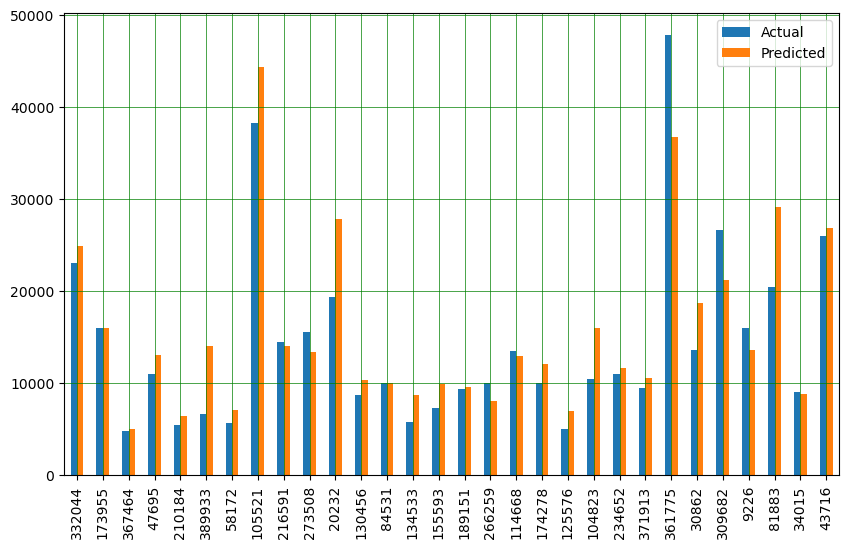

In [166]:
import matplotlib.pyplot as plt

df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [167]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4177.2676974313845
Mean Squared Error: 297218113.5196707
Root Mean Squared Error: 17240.01489325548


In [151]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [152]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(nn, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

KeyboardInterrupt: 

Best Params: 
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}

In [ ]:
grid_predictions = grid.predict(X_test) 

In [ ]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
332044,23000.0,20129.801384
173955,16000.0,16715.639034
367464,4799.0,3135.050260
47695,11000.0,12277.705602
210184,5400.0,7190.864910


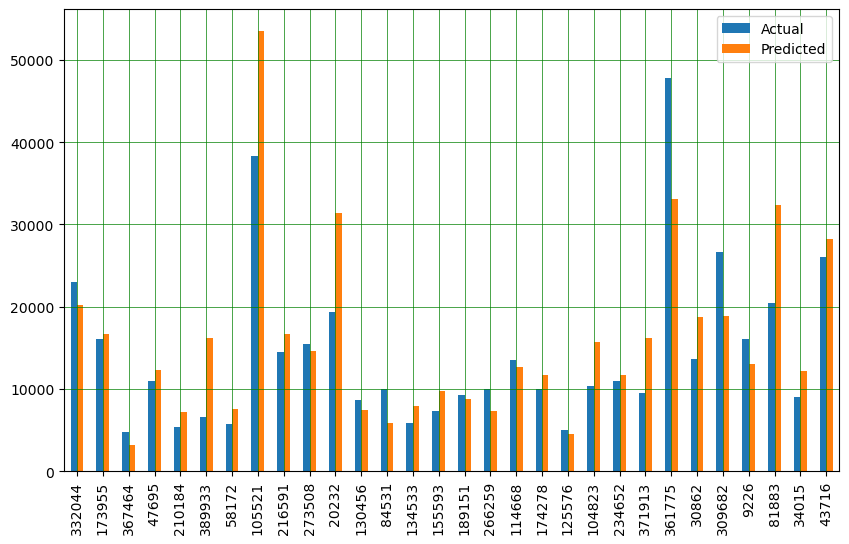

In [ ]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error: 5177.329648334305
Mean Squared Error: 383942269.40369207
Root Mean Squared Error: 19594.444860819407
